In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os, sys

In [12]:
folder = 'INSERT FILE PATH HERE'
data_file = 'TrainingSet.csv'
file_path = os.path.join(folder, data_file)

In [3]:
file_path

'C:\\Users\\Kendall\\Documents\\DrivenData Competitions\\UNDP 12-15\\TrainingSet.csv'

In [4]:
data = pd.read_csv(file_path)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195402 entries, 0 to 195401
Data columns (total 43 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          195402 non-null  int64  
 1   pred           195402 non-null  bool   
 2   1972 [YR1972]  64945 non-null   float64
 3   1973 [YR1973]  64443 non-null   float64
 4   1974 [YR1974]  64966 non-null   float64
 5   1975 [YR1975]  66973 non-null   float64
 6   1976 [YR1976]  67717 non-null   float64
 7   1977 [YR1977]  69735 non-null   float64
 8   1978 [YR1978]  69763 non-null   float64
 9   1979 [YR1979]  69906 non-null   float64
 10  1980 [YR1980]  75250 non-null   float64
 11  1981 [YR1981]  78034 non-null   float64
 12  1982 [YR1982]  79016 non-null   float64
 13  1983 [YR1983]  78982 non-null   float64
 14  1984 [YR1984]  79532 non-null   float64
 15  1985 [YR1985]  81017 non-null   float64
 16  1986 [YR1986]  81455 non-null   float64
 17  1987 [YR1987]  82752 non-null

### Count of null cells by column/year

In [6]:
data.isnull().sum()

index                 0
pred                  0
1972 [YR1972]    130457
1973 [YR1973]    130959
1974 [YR1974]    130436
1975 [YR1975]    128429
1976 [YR1976]    127685
1977 [YR1977]    125667
1978 [YR1978]    125639
1979 [YR1979]    125496
1980 [YR1980]    120152
1981 [YR1981]    117368
1982 [YR1982]    116386
1983 [YR1983]    116420
1984 [YR1984]    115870
1985 [YR1985]    114385
1986 [YR1986]    113947
1987 [YR1987]    112650
1988 [YR1988]    112160
1989 [YR1989]    109071
1990 [YR1990]     88447
1991 [YR1991]     88411
1992 [YR1992]     83159
1993 [YR1993]     80849
1994 [YR1994]     78579
1995 [YR1995]     70934
1996 [YR1996]     71028
1997 [YR1997]     69716
1998 [YR1998]     69458
1999 [YR1999]     64522
2000 [YR2000]     54855
2001 [YR2001]     58619
2002 [YR2002]     55087
2003 [YR2003]     56243
2004 [YR2004]     53023
2005 [YR2005]     33858
2006 [YR2006]     36514
2007 [YR2007]     33806
YRAVG                 0
YRSTD                 0
Country Name          0
Series Code     

In [7]:
mdg_series = ['1.2','2.1','3.2','4.1','5.1','6.1','6.7','7.8','8.16']

### Descemding order of data series by year

In [8]:
data[data['Series Code'].isin(mdg_series)].isnull().sum()

index               0
pred                0
1972 [YR1972]    1240
1973 [YR1973]    1240
1974 [YR1974]    1242
1975 [YR1975]    1233
1976 [YR1976]    1224
1977 [YR1977]    1217
1978 [YR1978]    1209
1979 [YR1979]    1207
1980 [YR1980]    1205
1981 [YR1981]    1186
1982 [YR1982]    1186
1983 [YR1983]    1180
1984 [YR1984]    1167
1985 [YR1985]    1166
1986 [YR1986]    1160
1987 [YR1987]    1160
1988 [YR1988]    1152
1989 [YR1989]    1156
1990 [YR1990]     596
1991 [YR1991]     768
1992 [YR1992]     734
1993 [YR1993]     712
1994 [YR1994]     659
1995 [YR1995]     590
1996 [YR1996]     552
1997 [YR1997]     570
1998 [YR1998]     534
1999 [YR1999]     473
2000 [YR2000]     420
2001 [YR2001]     439
2002 [YR2002]     434
2003 [YR2003]     419
2004 [YR2004]     420
2005 [YR2005]     393
2006 [YR2006]     382
2007 [YR2007]     404
YRAVG               0
YRSTD               0
Country Name        0
Series Code         0
Series Name         0
dtype: int64

### Checking top 25 countries in terms of count of data series included in the data file

In [9]:
data.groupby('Country Name').agg({'Series Code': 'size'}).sort_values(by='Series Code', ascending=False).head(25)

,Series Code
Country Name,
Bolivia,1255
Bangladesh,1242
India,1240
Sri Lanka,1239
Kyrgyz Republic,1236
Philippines,1236
Ghana,1233
Morocco,1233
Kenya,1232


### Checking how many data series each country has

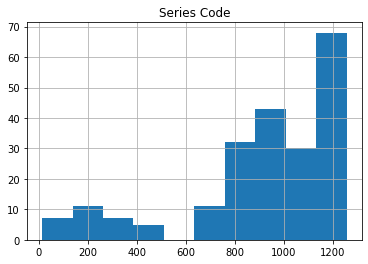

In [11]:
data.groupby('Country Name').agg({'Series Code': 'size'}).sort_values(by='Series Code', ascending=False).hist()
plt.show()

### 

### Arable land in hectacres for 2007

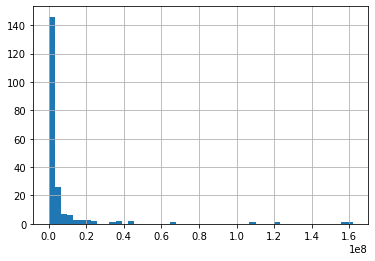

In [46]:
data[(data['Series Code']=='AG.LND.ARBL.HA')]['2007 [YR2007]'].hist(bins=50)
plt.show()

### Expecting a "linear' correlation between consecutive years

In [49]:
corr = data.corr()

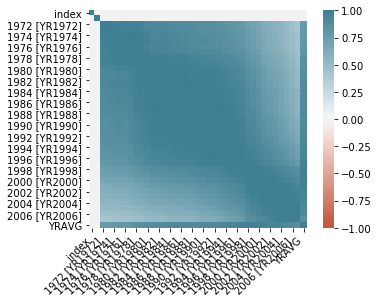

In [51]:
ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Backfill NAs or drop rows with too much missing data

### Create simple LSTM architecture

### Train model on timeseries data

### Assess model accuracy

### Make predictions for 1 and 5 year windows